https://www.canva.com/design/DAGg_7xMIDQ/p7QHIQVJY8HHaKbLiPgA6w/edit

In [ ]:
!pip install timm -q
!pip install seaborn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 20.1 MB/s eta 0:00:00


In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("ciplab/real-and-fake-face-detection")

# print("Path to dataset files:", path)

100%|██████████| 431M/431M [00:07<00:00, 57.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ciplab/real-and-fake-face-detection/versions/1


In [ ]:
# import shutil

# drive_path = "/content/drive/MyDrive/Quang/School/Semester 8/AIE"
# shutil.copytree(path, drive_path, dirs_exist_ok=True)

'/content/drive/MyDrive/Quang/School/Semester 8/AIE'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from tqdm.notebook import tqdm_notebook as tqdm
import os

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchvision.transforms import functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torch.optim.lr_scheduler import StepLR
from PIL import Image
import torch.nn.init as init
from sklearn.model_selection import train_test_split

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
# os.remove(os.path.join('/content/drive/MyDrive/Quang/School/Semester 8/AIE/real_and_fake_face/training_fake/easy_116_111.jpg'))

In [ ]:
real = "/content/drive/MyDrive/Quang/School/Semester 8/AIE/Face Detection/real_and_fake_face/training_real/"
fake = "/content/drive/MyDrive/Quang/School/Semester 8/AIE/Face Detection/real_and_fake_face/training_fake/"


real_path = os.listdir(real)
fake_path = os.listdir(fake)

In [ ]:
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image,(224, 224))
    return image[...,::-1]

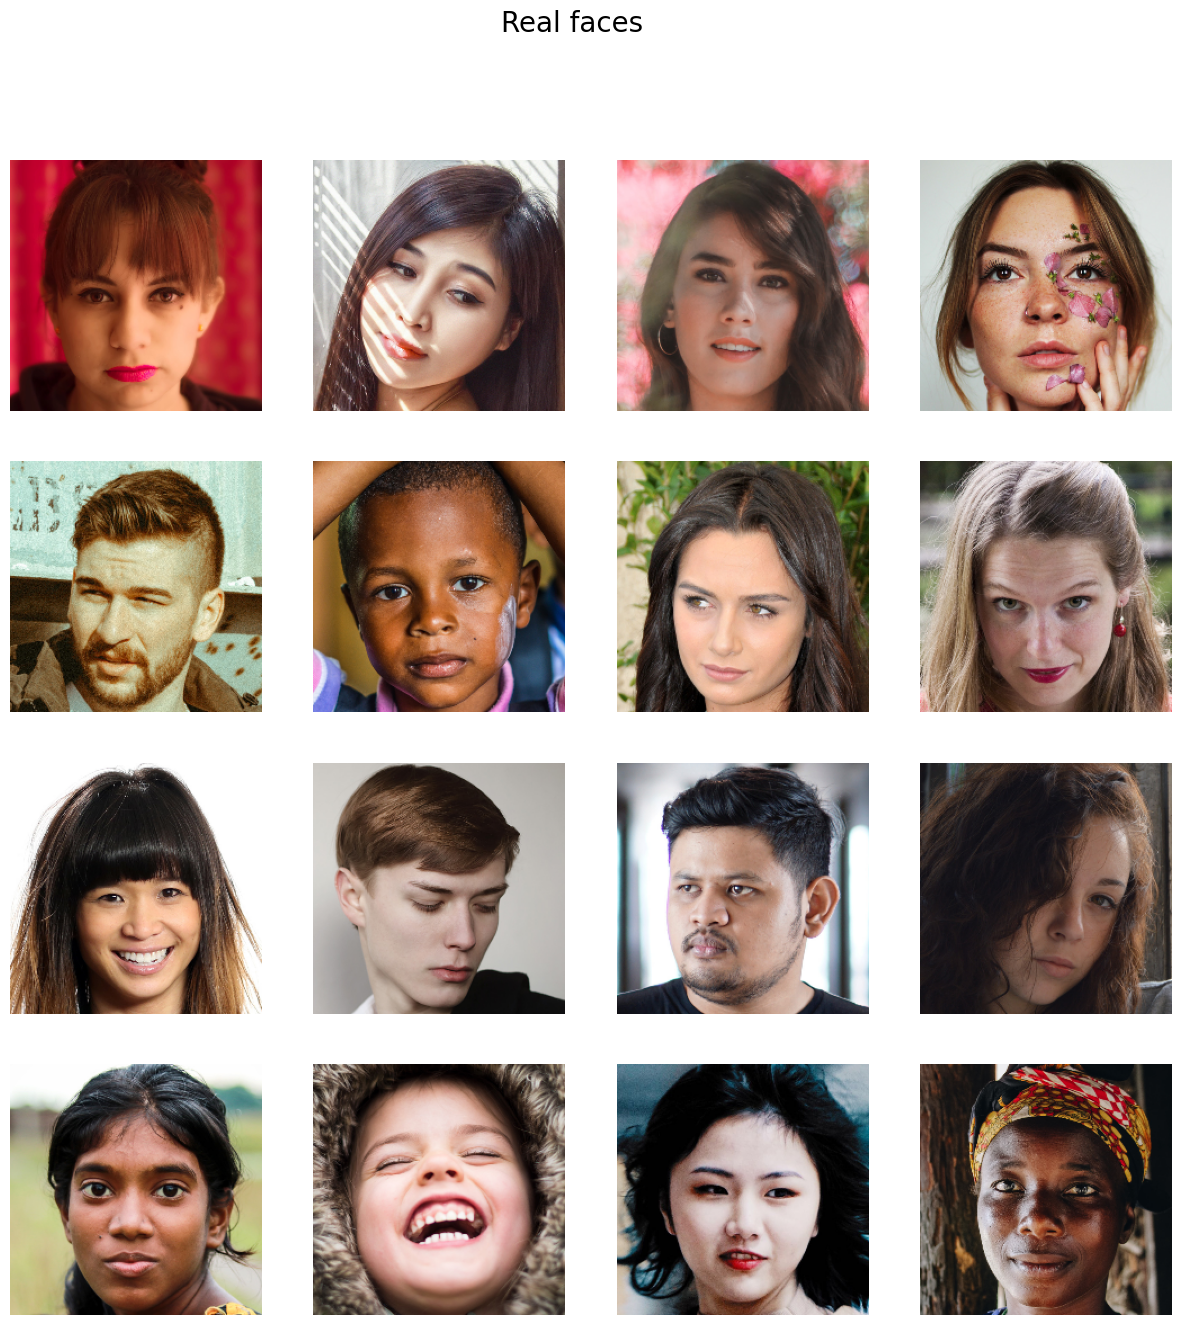

In [ ]:
fig = plt.figure(figsize=(15, 15))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(real + real_path[i]), cmap='gray')
    plt.suptitle("Real faces",fontsize=20)
    plt.axis('off')

plt.show()

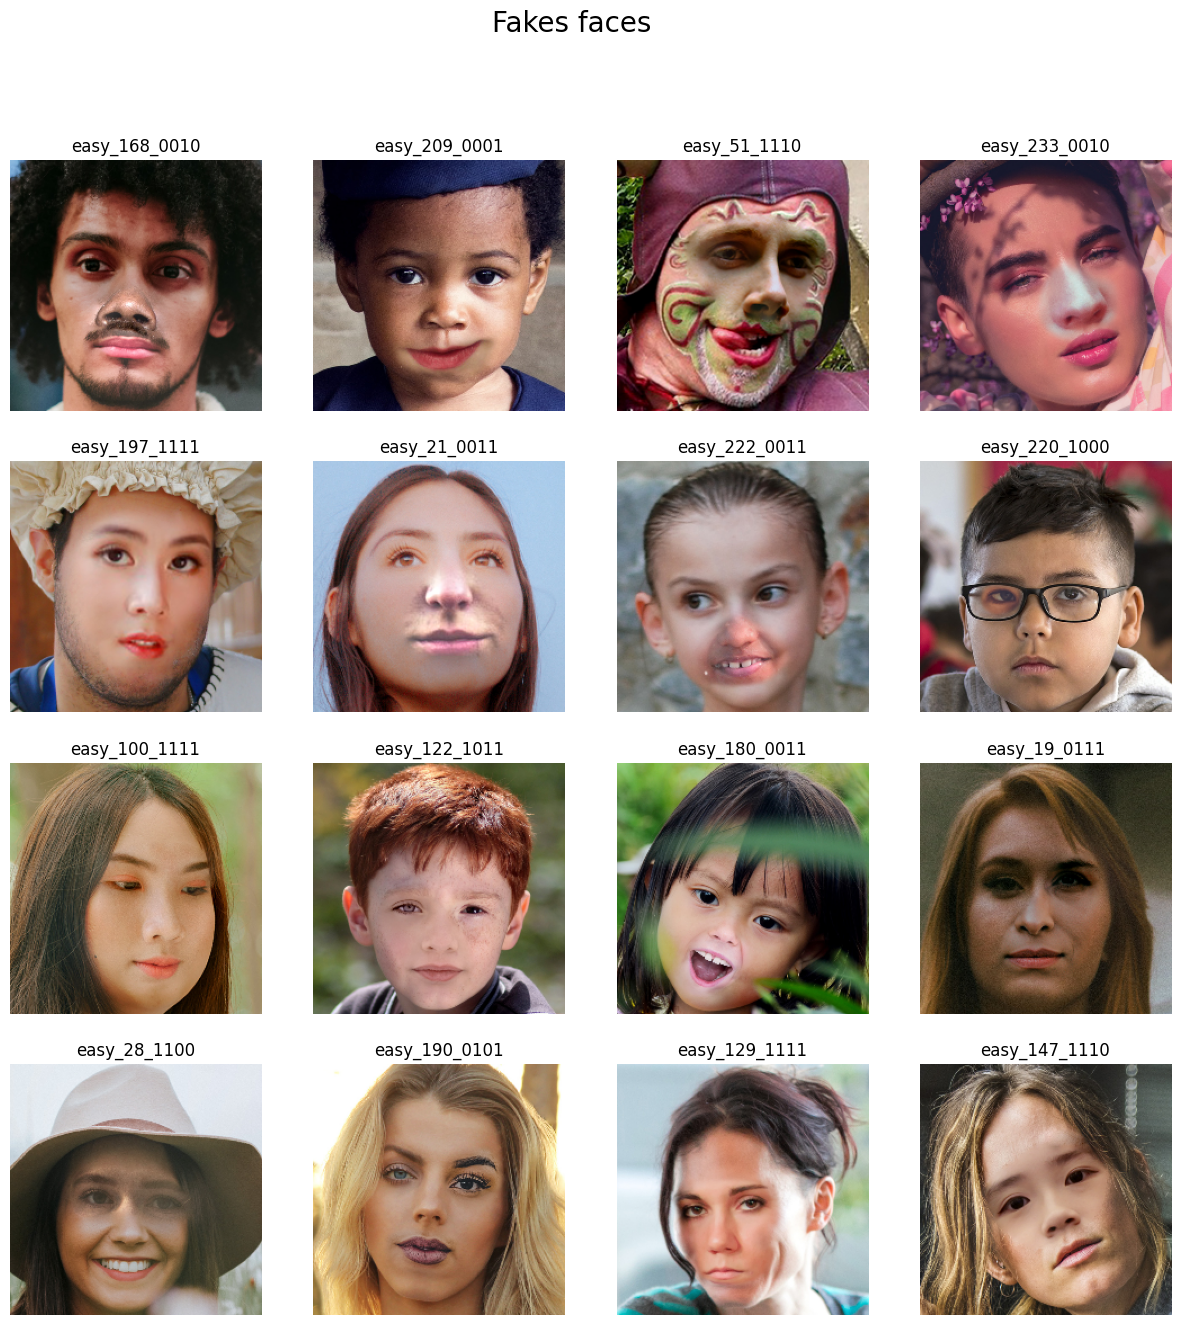

In [ ]:
fig = plt.figure(figsize=(15,15))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(fake + fake_path[i]), cmap='gray')
    plt.suptitle("Fakes faces",fontsize=20)
    plt.title(fake_path[i][:-4])
    plt.axis('off')

plt.show()

In [ ]:
dataset_path = "/content/drive/MyDrive/Quang/School/Semester 8/AIE/Face Detection/real_and_fake_face"

In [ ]:
def load_all_data(dir_root):
    image_paths = []
    labels = []
    label_map = {}

    for label_idx, label in enumerate(sorted(os.listdir(dir_root))):
        label_path = os.path.join(dir_root, label)
        if not os.path.isdir(label_path):
            continue

        label_map[label[-4:]] = label_idx
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            if os.path.isfile(image_path):
                image_paths.append(image_path)
                labels.append(label_idx)

    if not image_paths:
        raise ValueError(f"No images found in {dir_root}")

    return image_paths, labels, label_map

image_paths, labels, label_map = load_all_data(dataset_path)
train_paths, temp_paths, train_labels, temp_labels = train_test_split(image_paths, labels, train_size=0.9, stratify=labels, random_state=42)
val_paths, test_paths, val_labels, test_labels = train_test_split(temp_paths, temp_labels, test_size=0.3, stratify=temp_labels, random_state=42)

In [ ]:
label_map

{'fake': 0, 'real': 1}

In [ ]:
# for path in train_paths:
#     image = cv2.imread(path)
#     if image is None:
#         print(f"❌ Cannot read image: {path}")

In [ ]:
len(train_paths), len(train_labels), len(val_paths), len(val_labels), len(test_paths), len(test_labels)

(1836, 1836, 142, 142, 62, 62)

In [ ]:
class faceDataset(Dataset):
    def __init__(self, image_paths, labels, label_map, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.label_map = label_map
        self.transform = transform

        for path in image_paths:
            if not os.path.exists(path):
                print("Error: File does not exist!\n")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        try:
            image = cv2.imread(self.image_paths[idx])
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            label = torch.tensor(self.labels[idx], dtype=torch.long)

            if label == 0:  # fake
                attribute = torch.tensor([int(att) for att in self.image_paths[idx][-8:-4]], dtype=torch.long)
            else:
                attribute = torch.tensor([0, 0, 0, 0], dtype=torch.long)

            if self.transform:
                image = self.transform(image)

            return image, label, attribute

        except Exception as e:
            print(f"Error processing image: {self.image_paths[idx]}\n Error details: {e}")
            return None, None, None

In [ ]:
train_transform = transforms.Compose([transforms.ToPILImage(),
                                      transforms.RandomHorizontalFlip(p=0.5),  # Random horizontal flip
                                      transforms.RandomRotation(15),  # Random rotation ±15 degrees
                                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Color adjustment
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5126, 0.4277, 0.3852],
                                                           [0.2908, 0.2651, 0.2632])
])

val_transforms = transforms.Compose([transforms.ToPILImage(),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.5126, 0.4277, 0.3852],
                                                          [0.2908, 0.2651, 0.2632])
])

train_data = faceDataset(train_paths, train_labels, label_map, transform=train_transform)
valid_data = faceDataset(val_paths, val_labels, label_map, transform=val_transforms)
test_data = faceDataset(test_paths, test_labels, label_map, transform=val_transforms)

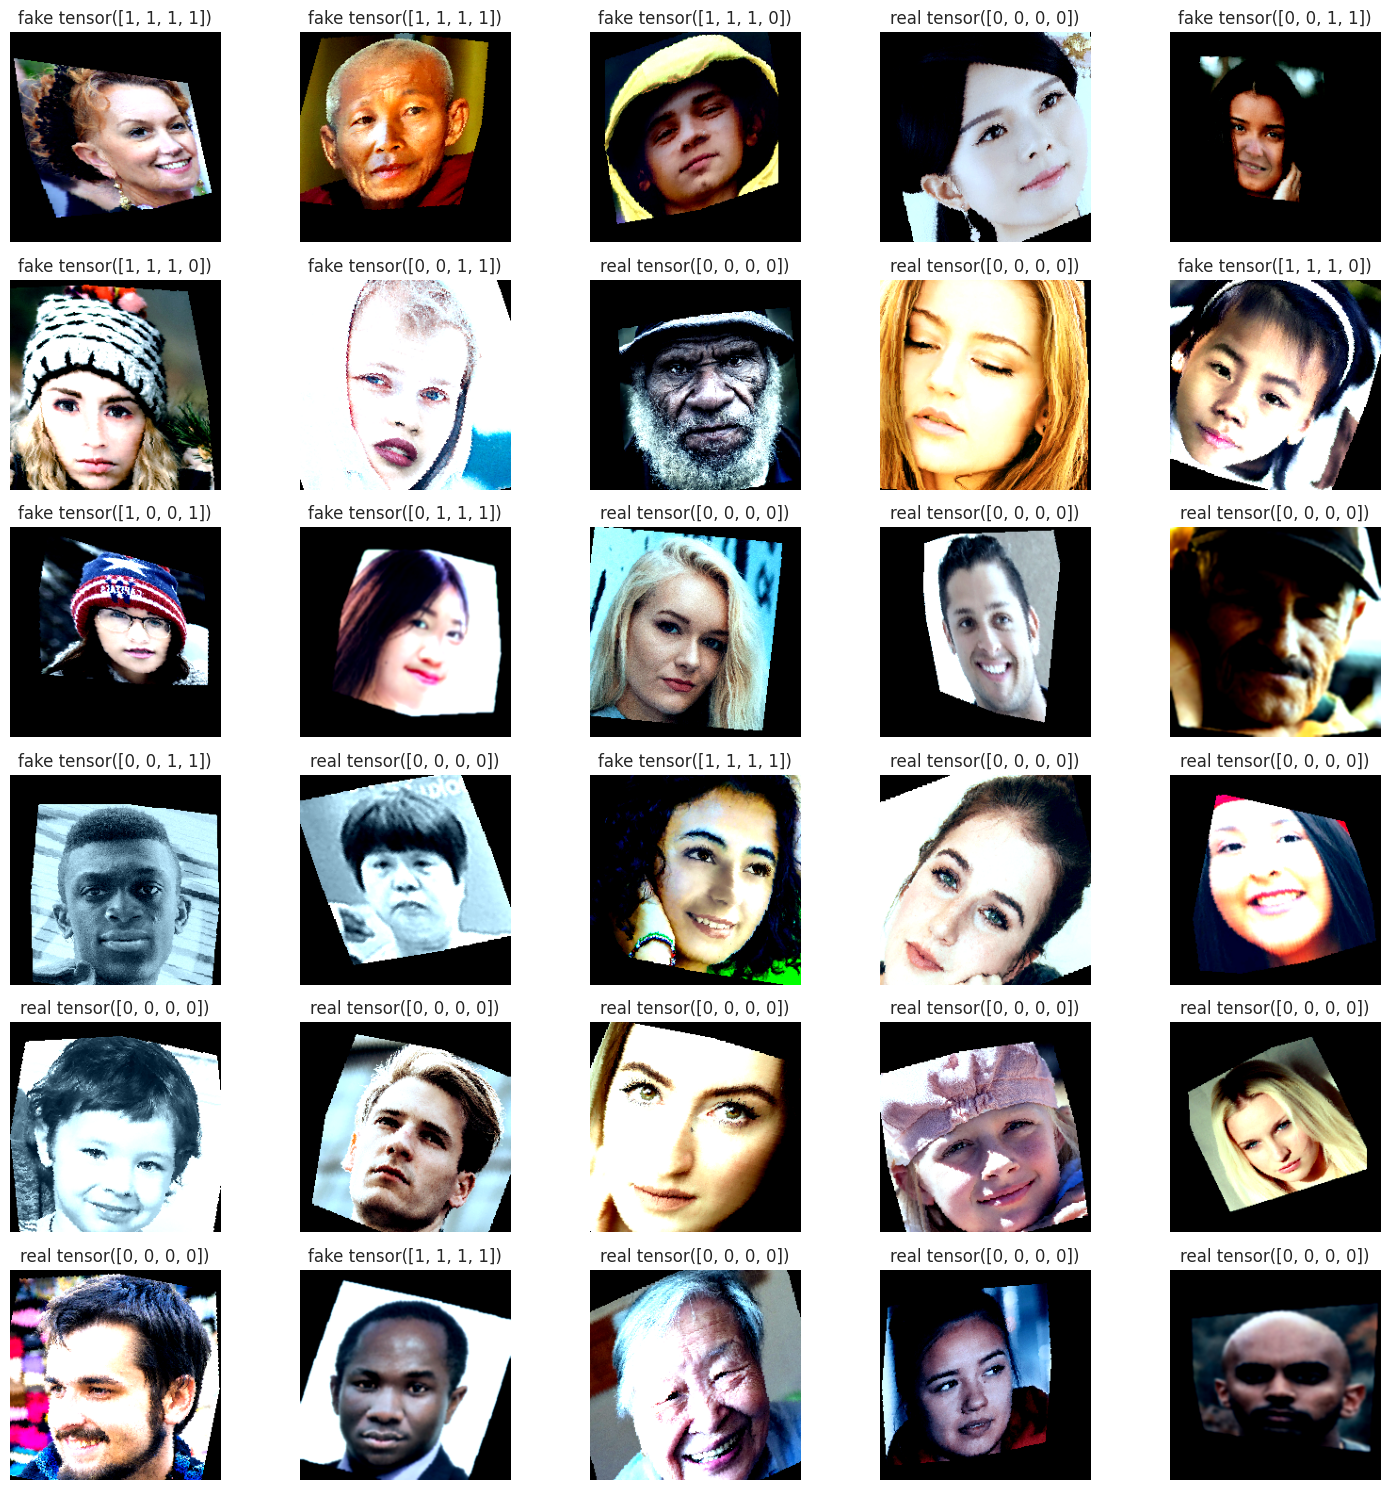

In [ ]:
import random

def imshow(img, title=""):
    """Function to display tensor or numpy array image"""
    if isinstance(img, torch.Tensor):
        img = img.cpu().numpy().transpose((1, 2, 0))  # From C x H x W to H x W x C
        img = img * np.array([0.5, 0.5, 0.5]) + np.array([0.5, 0.5, 0.5])
        img = np.clip(img, 0, 1)  # Limit values in [0, 1]
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

col = 5
row = 6
random_indices = random.sample(range(len(train_data)), row*col)

fig = plt.figure(figsize=(15, 15))
for i, idx in enumerate(random_indices):
    img, label, attribute = train_data[idx]
    label_name = [k for k, v in train_data.label_map.items() if v == label.item()][0]
    plt.subplot(row, col, i + 1)
    imshow(img, title=f"{label_name} {attribute}")

plt.tight_layout()
plt.show()

In [ ]:
def custom_collate_fn(batch):
    images = torch.stack([item[0] for item in batch])
    labels = torch.stack([item[1] for item in batch])
    attributes = torch.stack([item[2] for item in batch])

    return images, labels, attributes

In [ ]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, collate_fn=custom_collate_fn)
valid_loader = DataLoader(valid_data, batch_size=64, shuffle=False, collate_fn=custom_collate_fn)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False, collate_fn=custom_collate_fn)

In [ ]:
# compute_transform = transforms.Compose([transforms.ToTensor()])
# train_data = faceDataset(train_paths, train_labels, label_map, transform=compute_transform)
# train_loader = DataLoader(train_data, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)

# mean = 0.0 # [0.5126, 0.4277, 0.3852]
# total_sample = 0
# for images, _, _ in tqdm(train_loader, desc="Tính mean"):
#     batch_samples = images.size(0)  # [32, 3, 224, 224]
#     total_sample += batch_samples
#     images = images.view(batch_samples, images.size(1), -1) # [batch_size, channels, height * width]
#     mean += images.mean(2).sum(0) # [3]
# mean = mean / total_sample

# variance = 0.0 # [0.2908, 0.2651, 0.2632]
# num_pixels = 0
# for images, _, _ in tqdm(train_loader, desc="Tính Variance"):
#     batch_samples = images.size(0)
#     images = images.view(batch_samples, images.size(1), -1) # [batch_size, channels, height * width]
#     variance += ((images - mean.unsqueeze(1))**2).sum([0,2])
#     num_pixels += batch_samples * images.size(2)
# std = torch.sqrt(variance / num_pixels)

# print(mean, std)

Tính mean:   0%|          | 0/58 [00:00<?, ?it/s]

Tính Variance:   0%|          | 0/58 [00:00<?, ?it/s]

tensor([0.5126, 0.4277, 0.3852]) tensor([0.2908, 0.2651, 0.2632])


In [ ]:
class VGG16(nn.Module):
    def __init__(self, n_classes=10, init_weights=True):
        super(VGG16, self).__init__()

        self.feature_extractor = nn.Sequential(
            self.create_conv_block([3, 64], [64, 64], [3, 3], [1, 1], 2, 2), # In, Out, KernelSize, Stride, Padding, Pooling_Kernel
            self.create_conv_block([64, 128], [128, 128], [3, 3], [1, 1], 2, 2),
            self.create_conv_block([128, 256, 256], [256, 256, 256], [3, 3, 3], [1, 1, 1], 2, 2),
            self.create_conv_block([256, 512, 512], [512, 512, 512], [3, 3, 3], [1, 1, 1], 2, 2),
            self.create_conv_block([512, 512, 512], [512, 512, 512], [3, 3, 3], [1, 1, 1], 2, 2),
        )

        self.flatten = nn.Flatten()

        self.FC_layer = nn.Sequential(
            self.create_fc_layer(7*7*512, 1028),
            self.create_fc_layer(1028, 512),
        )

        self.classifier = nn.Linear(in_features=512, out_features=10)

        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        feature = self.feature_extractor(x)
        feature = self.flatten(feature)
        feature = self.FC_layer(feature)
        output = self.classifier(feature)

        return output

    def create_conv_layer(self, chann_in, chann_out, kernel_size, padding_size):
        layer = nn.Sequential(
            nn.Conv2d(chann_in, chann_out, kernel_size=kernel_size, padding=padding_size),
            nn.BatchNorm2d(chann_out),
            nn.SiLU()
        )

        return layer

    def create_conv_block(self, list_chann_in, list_chann_out, list_kernel_size, list_padding_size, pooling_kernel, pooling_Stride):
        layers = [self.create_conv_layer(list_chann_in[i], list_chann_out[i], list_kernel_size[i], list_padding_size[i])
                    for i in range(len(list_chann_in))]

        layers += [nn.MaxPool2d(kernel_size=pooling_kernel, stride=pooling_Stride)]

        return nn.Sequential(*layers)

    def create_fc_layer(self, chann_in, chann_out):
        layer = nn.Sequential(
            nn.Linear(chann_in, chann_out),
            nn.SiLU()
        )

        return layer

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

In [ ]:
'''
    Function for computing the accuracy of the predictions over the entire data_loader
'''
def get_accuracy(model, data_loader, device):
    correct = 0
    total = 0

    with torch.no_grad():
        model.eval()
        for images, labels, attributes in data_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs[:,0:2].data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100*(correct/total)

'''
    Function for plotting training and validation losses
'''
def plot_history(history):
    train_losses, valid_losses, train_acc, valid_acc = history

    # Set seaborn style for better plots
    sns.set_style("darkgrid")

    # Plot Accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(train_acc, label='Training Accuracy', color='blue')
    plt.plot(valid_acc, label='Validation Accuracy', color='red')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot Losses
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss', color='green')
    plt.plot(valid_losses, label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

'''
    function for the training step of the training loop
'''
def train(train_loader, model, criterion, optimizer, device):
    model.train()
    running_loss = 0

    for images, labels, attributes in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss1 = criterion(outputs[:,0:2], labels)
        loss2 = 0
        for idx, i in enumerate(range(2, 10, 2)):
            loss2 += criterion(outputs[:,i:i+2], attributes[:,idx].to(device))

        total_loss = 0.6*loss1 + 0.4*loss2
        running_loss += total_loss.item()

        # backward and optimizer
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

    epoch_loss = running_loss / len(train_loader)

    return model, optimizer, epoch_loss

'''
    function for the validation step of the training loop
'''
def validate(valid_loader, model, criterion, device):
    model.eval()
    running_loss = 0

    for images, labels, attributes in valid_loader:
        images = images.to(device)
        labels = labels.to(device)

        # forward pass and record loss
        outputs = model(images)
        loss1 = criterion(outputs[:,0:2], labels)
        loss2 = 0
        for idx, i in enumerate(range(2, 10, 2)):
            loss2 += criterion(outputs[:,i:i+2], attributes[:,idx].to(device))

        total_loss = 0.6*loss1 + 0.4*loss2
        running_loss += total_loss.item()

    epoch_loss = running_loss / len(valid_loader)

    return model, epoch_loss

'''
    function defining the entire training loop
'''
def training_loop(model, criterion, optimizer, scheduler, train_loader, valid_loader, epochs, device, print_every=1, save_path="model_checkpoint.pth"):
    # set object for storing metrics
    best_loss = 1e10
    train_losses = []
    valid_losses = []
    list_train_acc = []
    list_val_acc = []

    # train model
    for epoch in range(0, epochs):
        # training
        model, optimizer, train_loss = train(train_loader, model, criterion, optimizer, device)

        # validation
        with torch.no_grad():
            model, valid_loss = validate(valid_loader, model, criterion, device)

        if epoch % print_every == print_every - 1:
            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)


            print('Epochs: {}, Train_loss: {}, Valid_loss: {}, Train_accuracy: {}, Valid_accuracy: {}'.format(
                    epoch, train_loss, valid_loss, train_acc, valid_acc
                    ))

            list_train_acc.append(train_acc)
            list_val_acc.append(valid_acc)
            train_losses.append(train_loss)
            valid_losses.append(valid_loss)

            checkpoint = {
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'train_loss': train_loss,
                    'valid_loss': valid_loss
        }
        torch.save(checkpoint, f"{save_path}_epoch_{epoch}.pth")
        optimizer.step()
        scheduler.step()

    # plot_losses(list_train_acc, list_val_acc)

    return model, optimizer, (train_losses, valid_losses, list_train_acc, list_val_acc)

In [ ]:
# model = VGG16(10).to(device)
# optimizer = torch.optim.AdamW(model.parameters(), lr=0.01, weight_decay=1e-4)
# loss_function = nn.CrossEntropyLoss()
# scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

In [ ]:
# model, optimizer, history = training_loop(model, loss_function, optimizer, scheduler, train_loader, test_loader, 30, device)

Epochs: 0, Train_loss: 24.94028685216246, Valid_loss: 1.526445984840393, Train_accuracy: 51.089324618736384, Valid_accuracy: 50.0
Epochs: 1, Train_loss: 1.5460972765396381, Valid_loss: 1.3879212737083435, Train_accuracy: 50.21786492374728, Valid_accuracy: 40.32258064516129
Epochs: 2, Train_loss: 1.4338466298991237, Valid_loss: 1.386985957622528, Train_accuracy: 52.99564270152506, Valid_accuracy: 53.2258064516129
Epochs: 3, Train_loss: 1.4249423598421032, Valid_loss: 1.3890077471733093, Train_accuracy: 52.99564270152506, Valid_accuracy: 53.2258064516129
Epochs: 4, Train_loss: 1.4399712620110348, Valid_loss: 1.3892912864685059, Train_accuracy: 52.99564270152506, Valid_accuracy: 53.2258064516129
Epochs: 5, Train_loss: 1.4246604935876255, Valid_loss: 1.3839951157569885, Train_accuracy: 52.99564270152506, Valid_accuracy: 53.2258064516129
Epochs: 6, Train_loss: 1.5027380441797191, Valid_loss: 1.3931602239608765, Train_accuracy: 52.99564270152506, Valid_accuracy: 53.2258064516129
Epochs: 7, T

KeyboardInterrupt: 

In [ ]:
import torchvision.models as models
vgg16 = models.vgg16(weights=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 87.5MB/s]


In [ ]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
for param in vgg16.features.parameters():
    param.requires_grad = False

In [ ]:
vgg16.classifier = nn.Sequential(
    nn.Linear(25088, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10),
)

In [ ]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
total_params = sum(p.numel() for p in vgg16.parameters())
print(f'{total_params:,} total parameters.')

total_trainable_params = sum(p.numel() for p in vgg16.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

27,694,154 total parameters.
12,979,466 training parameters.


In [ ]:
vgg16 = vgg16.to(device)

In [ ]:
optimizer = torch.optim.AdamW(vgg16.parameters(), lr=0.001, weight_decay=1e-4)
loss_function = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

In [ ]:
vgg16, optimizer, history = training_loop(vgg16, loss_function, optimizer, scheduler, train_loader, test_loader, 20, device)

Epochs: 0, Train_loss: 1.4961958465905025, Valid_loss: 1.3686456680297852, Train_accuracy: 61.328976034858385, Valid_accuracy: 58.06451612903226
Epochs: 1, Train_loss: 1.3433863664495533, Valid_loss: 1.3109560012817383, Train_accuracy: 70.69716775599129, Valid_accuracy: 59.67741935483871
Epochs: 2, Train_loss: 1.2963169319876309, Valid_loss: 1.40911865234375, Train_accuracy: 69.06318082788671, Valid_accuracy: 58.06451612903226
Epochs: 3, Train_loss: 1.2307089896037662, Valid_loss: 1.3312596082687378, Train_accuracy: 76.90631808278867, Valid_accuracy: 69.35483870967742
Epochs: 4, Train_loss: 1.2176072967463527, Valid_loss: 1.4558191299438477, Train_accuracy: 77.01525054466231, Valid_accuracy: 66.12903225806451
Epochs: 5, Train_loss: 1.170970452242884, Valid_loss: 1.5884034633636475, Train_accuracy: 73.52941176470588, Valid_accuracy: 61.29032258064516
Epochs: 6, Train_loss: 1.1137896550112758, Valid_loss: 1.6000059843063354, Train_accuracy: 79.35729847494554, Valid_accuracy: 62.903225806

In [ ]:
train_transform = transforms.Compose([transforms.ToPILImage(),
                                      transforms.RandomHorizontalFlip(p=0.5),  # Lật ngang ngẫu nhiên
                                      transforms.RandomRotation(15),  # Xoay ngẫu nhiên ±15 độ
                                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # Điều chỉnh màu
                                      transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10), # học được các biến đổi hình học có thể xảy ra do chỉnh sửa ảnh
                                      transforms.RandomPerspective(distortion_scale=0.5, p=0.3), # biến đổi phối cảnh có thể xảy ra do chỉnh sửa ảnh, chẳng hạn như thay đổi góc nhìn 3D
                                      transforms.RandomGrayscale(p=0.1), # tập trung vào cấu trúc và kết cấu của ảnh, thay vì màu sắc.
                                      transforms.RandomApply([transforms.GaussianBlur(kernel_size=5)], p=0.2), # các đặc điểm kết cấu của ảnh, chẳng hạn như độ mịn hoặc độ sắc nét
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5126, 0.4277, 0.3852],
                                                           [0.2908, 0.2651, 0.2632])
])

val_transforms = transforms.Compose([transforms.ToPILImage(),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.5126, 0.4277, 0.3852],
                                                          [0.2908, 0.2651, 0.2632])
])

train_data = faceDataset(train_paths, train_labels, label_map, transform=train_transform)
valid_data = faceDataset(val_paths, val_labels, label_map, transform=val_transforms)
test_data = faceDataset(test_paths, test_labels, label_map, transform=val_transforms)

In [ ]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, collate_fn=custom_collate_fn)
valid_loader = DataLoader(valid_data, batch_size=64, shuffle=False, collate_fn=custom_collate_fn)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False, collate_fn=custom_collate_fn)

In [ ]:
import torchvision.models as models
from torchvision.models import VGG16_Weights
vgg16 = models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1)

In [ ]:
for param in vgg16.features.parameters():
    param.requires_grad = False

In [ ]:
vgg16.classifier = nn.Sequential(
    nn.Linear(25088, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 10),
)

In [ ]:
total_params = sum(p.numel() for p in vgg16.parameters())
print(f'{total_params:,} total parameters.')

total_trainable_params = sum(p.numel() for p in vgg16.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

27,694,154 total parameters.
12,979,466 training parameters.


In [ ]:
vgg16 = vgg16.to(device)

In [ ]:
optimizer = torch.optim.AdamW(vgg16.parameters(), lr=0.001, weight_decay=5e-4)
loss_function = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

In [ ]:
vgg16, optimizer, history = training_loop(vgg16, loss_function, optimizer, scheduler, train_loader, test_loader, 20, device)

Epochs: 0, Train_loss: 1.453091917366817, Valid_loss: 1.3617050647735596, Train_accuracy: 54.629629629629626, Valid_accuracy: 53.2258064516129
Epochs: 1, Train_loss: 1.425389055548043, Valid_loss: 1.3258670568466187, Train_accuracy: 57.78867102396514, Valid_accuracy: 54.83870967741935
Epochs: 2, Train_loss: 1.3916223378017032, Valid_loss: 1.3098845481872559, Train_accuracy: 60.23965141612201, Valid_accuracy: 53.2258064516129
Epochs: 3, Train_loss: 1.380085908133408, Valid_loss: 1.3032543659210205, Train_accuracy: 61.87363834422658, Valid_accuracy: 61.29032258064516
Epochs: 4, Train_loss: 1.37871357901343, Valid_loss: 1.2862249612808228, Train_accuracy: 61.22004357298475, Valid_accuracy: 61.29032258064516
Epochs: 5, Train_loss: 1.378360522204432, Valid_loss: 1.2857943773269653, Train_accuracy: 63.0718954248366, Valid_accuracy: 62.903225806451616
Epochs: 6, Train_loss: 1.3476973114342525, Valid_loss: 1.275539755821228, Train_accuracy: 61.87363834422658, Valid_accuracy: 67.74193548387096


In [ ]:
import shutil
# Current file path
src_path = "/content/model_checkpoint.pth_epoch_19.pth"

# New path (change as desired)
dst_path = "/content/drive/MyDrive/Quang/School/Semester 8/AIE/model_checkpoint.pth_epoch_19.pth"

# Move file
shutil.move(src_path, dst_path)

'/content/drive/MyDrive/Quang/School/Semester 8/AIE/model_checkpoint.pth_epoch_19.pth'

In [ ]:
dataiter = iter(test_loader)
images, labels, attributes = next(dataiter)
images = images.to(device)

vgg16.eval()

# Prediction
with torch.no_grad():
    outputs = vgg16(images)

pred_real_fake = torch.argmax(outputs[:, 0:2], dim=1)  # 0: fake, 1: real
pred_left_eye = torch.argmax(outputs[:, 2:4], dim=1)
pred_right_eye = torch.argmax(outputs[:, 4:6], dim=1)
pred_nose = torch.argmax(outputs[:, 6:8], dim=1)
pred_mouth = torch.argmax(outputs[:, 8:10], dim=1)

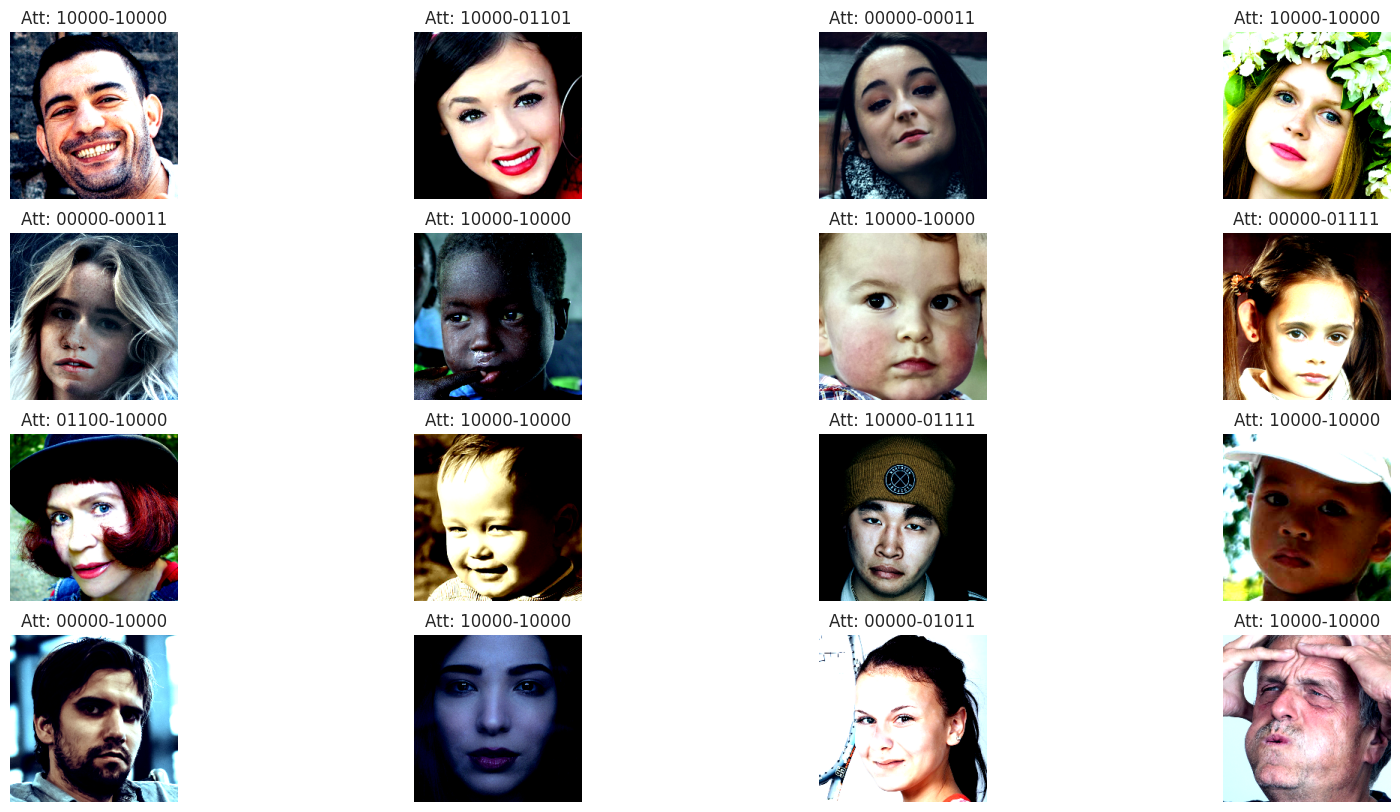

In [ ]:
plt.figure(figsize=(20, 10))
num_images = min(16, images.shape[0])

for i in range(num_images):
    plt.subplot(4, 4, i + 1)
    imshow(images[i])
    plt.title(f"Att: {pred_real_fake[i].item()}{pred_left_eye[i].item()}{pred_right_eye[i].item()}{pred_nose[i].item()}{pred_mouth[i].item()}-{labels[i].item()}{attributes[i, 0].item()}{attributes[i, 1].item()}{attributes[i, 2].item()}{attributes[i, 3].item()}")
plt.show()


In [ ]:
test_data.label_map

{'fake': 0, 'real': 1}

In [ ]:
def load_checkpoint(model, optimizer, checkpoint_path, device='cpu'):
    checkpoint = torch.load(checkpoint_path, map_location=device)

    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    train_loss = checkpoint['train_loss']
    valid_loss = checkpoint['valid_loss']

    print(f"Checkpoint loaded: Epoch {epoch}, Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}")
    return model, optimizer, epoch

In [ ]:
import timm
model = timm.create_model("hf_hub:timm/resnet50.a1_in1k", pretrained=False)
model, optimizer, last_epoch = load_checkpoint(model, optimizer, "model_checkpoint_epoch_9.pth", device="cuda")